From https://github.com/LSSTDESC/rail_lephare/blob/main/examples/cosmos_demo.ipynb

In [29]:
from matplotlib import pyplot as plt
from roman_photoz import RomanCatalogProcess
from roman_photoz.default_config_file import default_roman_config

In [30]:
config_file = default_roman_config
config_file

{'ADAPT_BAND': '5',
 'ADAPT_CONTEXT': '-1',
 'ADAPT_LIM': '1.5,23.0',
 'ADAPT_MODBIN': '1,1000',
 'ADAPT_ZBIN': '0.01,6',
 'ADDITIONAL_MAG': 'none',
 'ADD_DUSTEM': 'NO',
 'ADD_EMLINES': '0,10000',
 'AGE_RANGE': '0.,15.e9',
 'AUTO_ADAPT': 'NO',
 'CAT_FMT': 'MEME',
 'CAT_IN': 'change_me_to_output_filename_required.ascii',
 'CAT_LINES': '0,1000000000',
 'CAT_MAG': 'AB',
 'CAT_OUT': 'zphot.out',
 'CAT_TYPE': 'LONG',
 'CHI2_OUT': 'NO',
 'COSMOLOGY': '70,0.3,0.7',
 'DZ_WIN': '1.0',
 'EBV_RANGE': '0,9',
 'EB_V': '0.,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5',
 'EM_DISPERSION': '0.5,0.75,1.,1.5,2.',
 'EM_LINES': 'EMP_UV',
 'ERR_FACTOR': '1.5',
 'ERR_SCALE': '0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.05,0.05,0.05,0.05,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.05,0.05,0.05,0.05,0.1,0.2,0.3',
 'EXTERNALZ_FILE': 'NONE',
 'EXTINC_LAW': 'SMC_prevot.dat,SB_calzetti.dat,SB_calzetti_bump1.dat,SB_calzetti_bump2.dat',
 'FILTER_CALIB': '0,0,0,0,0,0,0,0',
 'FILTER_FILE': 'filter_roman',
 'FILT

In [5]:
import lephare as lp
config_file = lp.default_cosmos_config
config_file

{'ADAPT_BAND': '5',
 'ADAPT_CONTEXT': '-1',
 'ADAPT_LIM': '1.5,23.0',
 'ADAPT_MODBIN': '1,1000',
 'ADAPT_ZBIN': '0.01,6',
 'ADDITIONAL_MAG': 'none',
 'ADD_DUSTEM': 'NO',
 'ADD_EMLINES': '0,10000',
 'AGE_RANGE': '0.,15.e9',
 'AUTO_ADAPT': 'NO',
 'CAT_FMT': 'MEME',
 'CAT_IN': 'change_me_to_output_filename_required.ascii',
 'CAT_LINES': '0,1000000000',
 'CAT_MAG': 'AB',
 'CAT_OUT': 'zphot.out',
 'CAT_TYPE': 'LONG',
 'CHI2_OUT': 'NO',
 'COSMOLOGY': '70,0.3,0.7',
 'DZ_WIN': '1.0',
 'EBV_RANGE': '0,9',
 'EB_V': '0.,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5',
 'EM_DISPERSION': '0.5,0.75,1.,1.5,2.',
 'EM_LINES': 'EMP_UV',
 'ERR_FACTOR': '1.5',
 'ERR_SCALE': '0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.05,0.05,0.05,0.05,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.05,0.05,0.05,0.05,0.1,0.2,0.3',
 'EXTERNALZ_FILE': 'NONE',
 'EXTINC_LAW': 'SMC_prevot.dat,SB_calzetti.dat,SB_calzetti_bump1.dat,SB_calzetti_bump2.dat',
 'FILTER_CALIB': '0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,

In [6]:
rcp = RomanCatalogProcess(config_filename=config_file)

In [7]:
rcp.process()

Registry file downloaded and saved as data_registry.txt.
Checking/downloading 445 files...
445 completed.
All files downloaded successfully and are non-empty.
Checking/downloading 2 files...
2 completed.
All files downloaded successfully and are non-empty.
30
rail_lephare is setting the Z_STEP config to 0.01,0.0,3.0 based on the informer params.
User defined LEPHAREDIR is set. Code runs depend on all required
auxiliary data being present at /Users/mteodoro/LEPHARE.
User defined LEPHAREWORK is set. All intermediate files will be written to:
 /Users/mteodoro/LEPHARE/inform_COSMOS
Inserting handle into data store.  input: None, inform_COSMOS
# NAME                        IDENT      Lbda_mean Lbeff(Vega)       FWHM     AB-cor    TG-cor      VEGA M_sun(AB)   CALIB      Lb_eff    Fac_corr
u_cfht.lowres                 1             0.3844      0.3908      0.0538    0.3150   -0.3891  -20.6345    6.0327       0      0.3815      1.0000
u_new.pb                      2             0.3690      0.3

In [9]:
rcp.estimated.data[13].ancil

{'zmode': 1.62,
 'zmean': 1.633647020586028,
 'Z_BEST': 1.6128956543442583,
 'CHI_BEST': 22.421965512105338,
 'ZQ_BEST': 1.532422119217432,
 'CHI_QSO': 26.650355908067006,
 'MOD_STAR': 127,
 'CHI_STAR': 507.3813584848924}

In [10]:
import numpy as np

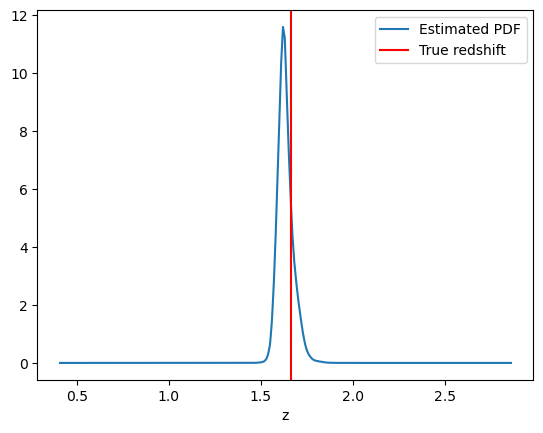

In [9]:
indx = 13
zmin = rcp.estimated.data[indx].ancil["zmean"] * 0.25
zmax = rcp.estimated.data[indx].ancil["zmean"] * 1.75
zgrid = np.linspace(zmin, zmax, 1000)
plt.plot(
    zgrid, np.squeeze(rcp.estimated.data[indx].pdf(zgrid)), label="Estimated PDF"
)
plt.axvline(x=rcp.data["redshift"][indx], color="r", label="True redshift")
plt.legend()
plt.xlabel("z")
plt.show()

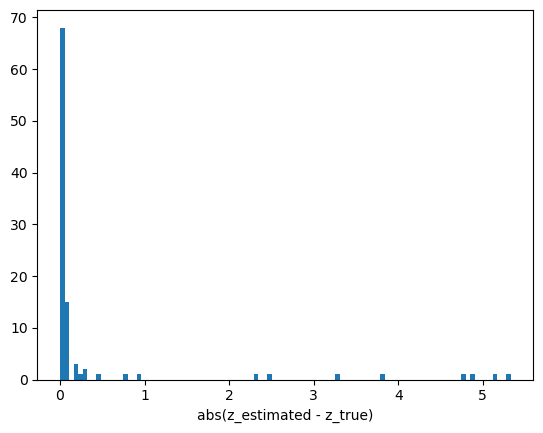

In [10]:
estimate_diff_from_truth = np.abs(
    rcp.estimated.data.ancil["zmode"] - rcp.data["redshift"]
)

plt.figure()
plt.hist(estimate_diff_from_truth, 100)
plt.xlabel("abs(z_estimated - z_true)")
plt.show()

Text(0, 0.5, '$z_{LePHARE}$')

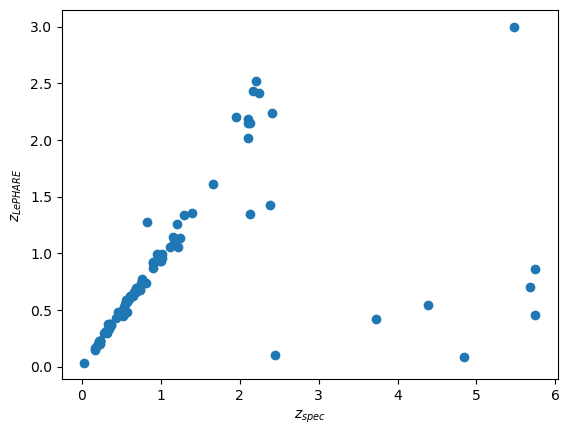

In [11]:
plt.scatter(rcp.data["redshift"], rcp.estimated.data.ancil["Z_BEST"])
plt.xlabel("$z_{spec}$")
plt.ylabel("$z_{LePHARE}$")

Text(0, 0.5, '$z_{LePHARE}$')

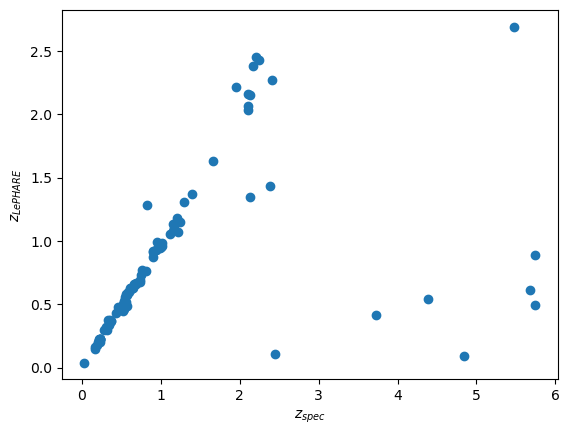

In [12]:
plt.scatter(rcp.data["redshift"], rcp.estimated.data.ancil["zmean"])
plt.xlabel("$z_{spec}$")
plt.ylabel("$z_{LePHARE}$")

In [12]:
import h5py

with h5py.File("output_test_Lephare_COSMOS.hdf5", "r") as f:
    def print_attrs(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f"Dataset: {name}")

    f.visititems(print_attrs)

Dataset: ancil/CHI_BEST
Dataset: ancil/CHI_QSO
Dataset: ancil/CHI_STAR
Dataset: ancil/MOD_STAR
Dataset: ancil/ZQ_BEST
Dataset: ancil/Z_BEST
Dataset: ancil/zmean
Dataset: ancil/zmode
Dataset: data/yvals
Dataset: meta/pdf_name
Dataset: meta/pdf_version
Dataset: meta/xvals


In [ ]:
import pandas as pd

df = pd.read_hdf("output_test_Lephare_COSMOS.hdf5", "data/yvals")

print(df)